In [9]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

## Generate samples from the Forrester function



x_train_l =  np.array([[0.5,0.42],[0.50,0.65],[0.50,1],[0.5,1.35],[0.5,1.58],[0.7,0.42],[0.7,0.65],[0.7,1],[0.7,1.35],[0.7,1.58],[1,0.42],[1,0.65],[1,1],[1,1.35],[1,1.58],\
[1.3,0.42],[1.3,0.65],[1.3,1],[1.3,1.35],[1.3,1.58],[1.5,0.42],[1.5,0.65],[1.5,1],[1.5,1.35],[1.5,1.58]])
x_train_h = np.array([[0.5,0.42],[0.5,1.58],[1.5,0.42],[1.5,1.58]])
y_train_l = np.array([0.4986808747,
0.475976665,
0.4777031069,
0.4923418646,
0.5028265703,
0.4753060066,
0.4595472371,
0.4620449908,
0.4691087625,
0.4742488188,
0.4513367251,
0.4396361379,
0.4368311097,
0.437009123,
0.4393375827,
0.4180588293,
0.4084524096,
0.404768885,
0.4059021486,
0.40739032015181575,
0.3861760934,
0.3767324971,
0.3724887529,
0.3747228606,
0.3767415899])
y_train_h = np.array([0.5047597937,

0.5985461618,

0.2783293064,

0.3428283998159303,
])


In [10]:


x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]   

x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]   


X_train=np.append(x_train_l,x_train_h,axis=0)
Y_train=np.append(y_train_l,y_train_h,axis=0)
print(X_train)
print(Y_train)

print(X_train.shape[1])
Y_train=np.reshape(Y_train,(len(X_train),1))
print(Y_train)



[[0.5  0.42 0.  ]
 [0.5  0.65 0.  ]
 [0.5  1.   0.  ]
 [0.5  1.35 0.  ]
 [0.5  1.58 0.  ]
 [0.7  0.42 0.  ]
 [0.7  0.65 0.  ]
 [0.7  1.   0.  ]
 [0.7  1.35 0.  ]
 [0.7  1.58 0.  ]
 [1.   0.42 0.  ]
 [1.   0.65 0.  ]
 [1.   1.   0.  ]
 [1.   1.35 0.  ]
 [1.   1.58 0.  ]
 [1.3  0.42 0.  ]
 [1.3  0.65 0.  ]
 [1.3  1.   0.  ]
 [1.3  1.35 0.  ]
 [1.3  1.58 0.  ]
 [1.5  0.42 0.  ]
 [1.5  0.65 0.  ]
 [1.5  1.   0.  ]
 [1.5  1.35 0.  ]
 [1.5  1.58 0.  ]
 [0.5  0.42 1.  ]
 [0.5  1.58 1.  ]
 [1.5  0.42 1.  ]
 [1.5  1.58 1.  ]]
[0.49868087 0.47597667 0.47770311 0.49234186 0.50282657 0.47530601
 0.45954724 0.46204499 0.46910876 0.47424882 0.45133673 0.43963614
 0.43683111 0.43700912 0.43933758 0.41805883 0.40845241 0.40476889
 0.40590215 0.40739032 0.38617609 0.3767325  0.37248875 0.37472286
 0.37674159 0.50475979 0.59854616 0.27832931 0.3428284 ]
3
[[0.49868087]
 [0.47597667]
 [0.47770311]
 [0.49234186]
 [0.50282657]
 [0.47530601]
 [0.45954724]
 [0.46204499]
 [0.46910876]
 [0.47424882]
 [0.451336

In [11]:

kernels = [GPy.kern.RBF(1),GPy.kern.RBF(1)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)

lin_mf_model = model = GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=5)

## Fit the model
  
lin_mf_model.optimize()



 /home/mech/smdsouza/.local/lib/python3.9/site-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 2 then the given X dimension 3. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel
 /home/mech/smdsouza/.local/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/5, f = 381657.7248359041
Optimization restart 2/5, f = 381656.18394646206
Optimization restart 3/5, f = 381664.737272678
Optimization restart 4/5, f = 381661.49131887686
Optimization restart 5/5, f = 381661.55014328694


In [15]:

## Compute mean and variance predictions
testx = np.linspace(0.5,1.5, 101, endpoint=True)

testy= np.linspace(0.42,1.58, 101, endpoint=True)


x = [(a, b) for a in testx for b in testy] 
x=np.array([x])
x_plot=np.reshape(x,[10201,2])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]   
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]   



## Compute mean predictions and associated variance

## Compute mean predictions and associated variance

lf_mean_lin_mf_model, lf_var_lin_mf_model = lin_mf_model.predict(X_plot_l)

hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)






print(lf_mean_lin_mf_model)

print(hf_mean_lin_mf_model)

## Create standard GP model using only high-fidelity data
x_train_DNS=np.array([[0.5,0.42],[0.5,1],[0.5,1.58],[1,0.42],[1,1],[1,1.58],[1.5,0.42],[1.5,1],[1.5,1.58]])
y_train_DNS=np.array([0.5047597937,
0.5222562742,
0.5985461618,
0.4187630715,
0.3821620197,
0.4202147777,
0.2783293064,
0.3080605842,
0.3428283998159303
])
x_train_DNS=np.c_[ x_train_DNS, np.ones(len(x_train_DNS)) ]   
y_train_DNS=np.reshape(y_train_DNS,(len(x_train_DNS),1))





[[0.48950579]
 [0.48950579]
 [0.48950579]
 ...
 [0.37737236]
 [0.37737236]
 [0.37737236]]
[[0.55165298]
 [0.55165298]
 [0.55165298]
 ...
 [0.31057885]
 [0.31057885]
 [0.31057885]]


In [16]:

kernel = GPy.kern.RBF(1)

high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernel)
high_gp_model.Gaussian_noise.fix(0)

## Fit the GP model

high_gp_model.optimize_restarts(5)

hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)


print(hf_mean_high_gp_model)



Optimization restart 1/5, f = 399363.7885887812
Optimization restart 2/5, f = 399363.78813921975
Optimization restart 3/5, f = 399363.7872003597
Optimization restart 4/5, f = 399363.7879530477
Optimization restart 5/5, f = 399363.7872348359
[[0.54185397]
 [0.54185397]
 [0.54185397]
 ...
 [0.30973934]
 [0.30973934]
 [0.30973934]]


 /home/mech/smdsouza/.local/lib/python3.9/site-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 1 then the given X dimension 3. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel
 /home/mech/smdsouza/.local/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


 /home/mech/smdsouza/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1826: UserWarning:

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

 /home/mech/smdsouza/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1826: FutureWarning:

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



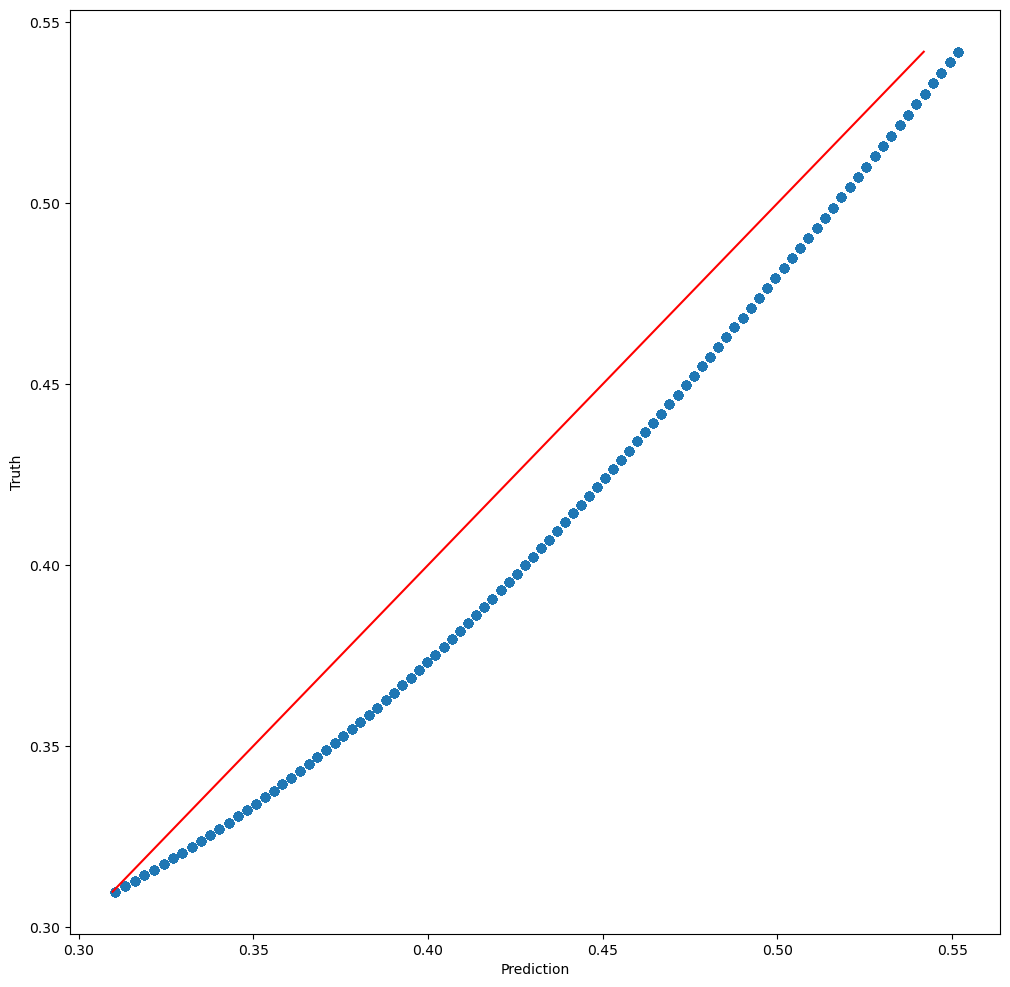

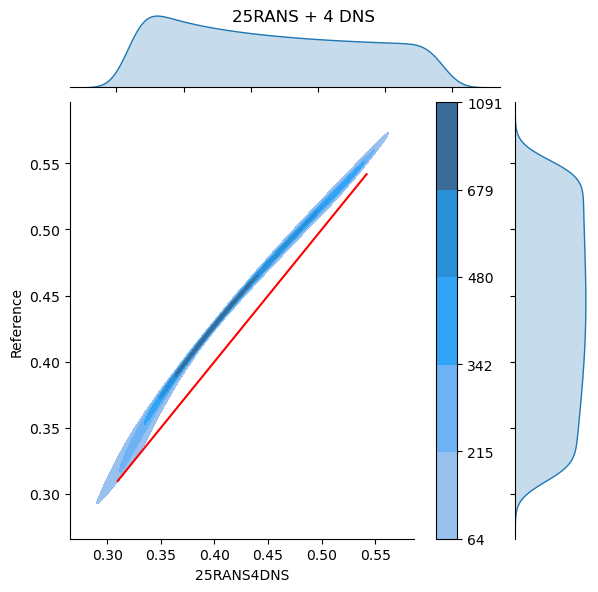

In [17]:
plt.figure(figsize=(12, 12))
plt.scatter(hf_mean_lin_mf_model, hf_mean_high_gp_model, alpha=0.1)
min_max = [hf_mean_high_gp_model.min(),hf_mean_high_gp_model.max()]
plt.plot(min_max, min_max, color='r')
plt.ylabel('Truth')
plt.xlabel('Prediction');

import pandas as pd
import seaborn as sns
df=pd.DataFrame({'25RANS4DNS': hf_mean_high_gp_model.flatten(),'Reference':hf_mean_lin_mf_model.flatten()})
rel=sns.jointplot(x="25RANS4DNS", y="Reference", kind = "kde",data = df, fill=True, n_levels = 6, shade = True, cbar = True, shade_lowest = False)
rel.fig.suptitle("25RANS + 4 DNS")
plt.plot(min_max, min_max, color='r')
plt.show()